In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_pickle("./clean_data.pickle")

In [9]:
data.head(10)


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,0,77516,3,13,0,1,3,0,1,1,0,40,0,0
1,50,2,83311,3,13,1,1,2,0,1,0,0,13,0,0
2,38,1,215646,2,9,0,2,3,0,1,0,0,40,0,0
3,53,1,234721,1,7,1,2,2,3,1,0,0,40,0,0
4,28,1,338409,3,13,1,1,1,3,0,0,0,40,1,0
5,37,1,284582,3,14,1,1,1,0,0,0,0,40,0,0
6,49,1,160187,1,5,0,2,3,3,0,0,0,16,1,0
7,52,2,209642,2,9,1,1,2,0,1,0,0,45,0,1
8,31,1,45781,3,14,0,1,3,0,0,1,0,50,0,1
9,42,1,159449,3,13,1,1,2,0,1,1,0,40,0,1


In [10]:
x = data.iloc[:, 0:14].to_numpy()
y= data["salary"].to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(x[0])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\DET PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
historial=model.fit(X_train_scaled,y_train,epochs=1000,batch_size=1000)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7635 - loss: 0.5436
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.3883 
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.3600 
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8329 - loss: 0.3548 
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8379 - loss: 0.3472 
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.3466 
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.3441
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8371 - loss: 0.3425 
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 0.3418 
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8414 - loss: 0.3363 
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.3411 
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

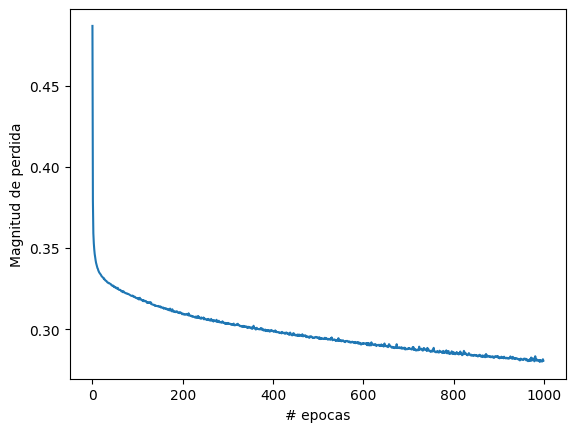

In [16]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [17]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8316 - loss: 0.3912
Test Loss: 0.3833478093147278
Test Accuracy: 0.8333455920219421


In [20]:
array=x[7]
array= array.reshape(1, -1) 
array=scaler.transform(array)
resultado = model.predict(array)
print(resultado)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.57184815]]
